JORGE ADRIÁN CARO CASTILLO A01570425

Final Project "Madden Ratings"

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import statsmodels.api as sm
import numpy as np
#from sklearn import linear_model

In [6]:
df = pd.read_csv('madden21_off_ratings.csv')
df.head()

,Team,Full Name,Overall Rating,Position,Age,Speed,Acceleration,Awareness,Agility,Strength,...,Jersey Number,Total Salary,Signing Bonus,Archetype,Running Style,Years Pro,Height,Weight,Birthdate,College
0,Titans,Derrick Henry,93,HB,26,91,88,98,84,87,...,22,"$10,280,000.00",$-,HB_PowerBack,Default Stride High and Tight,4,75,247,01/04/94,Alabama
1,Saints,Alvin Kamara,88,HB,25,89,94,87,93,77,...,41,"$4,070,000.00","$960,000.00",HB_ReceivingBack,Default,3,70,215,7/25/1995,Tennessee
2,Jets,Le'Veon Bell,87,HB,28,87,90,88,95,77,...,26,"$27,500,000.00","$25,000,000.00",HB_ElusiveBack,Default Stride High and Tight,7,73,225,2/18/1992,Michigan St.
3,Seahawks,Chris Carson,86,HB,25,88,89,90,83,83,...,32,"$3,830,000.00","$40,000.00",HB_PowerBack,Default Stride Loose,3,71,222,9/16/1994,Oklahoma St.
4,Broncos,Melvin Gordon III,84,HB,27,91,90,82,91,74,...,25,"$3,000,000.00","$13,000,000.00",HB_ElusiveBack,Default Stride Loose,5,73,215,4/13/1993,Wisconsin


In [7]:
df.shape

(1030, 69)

In [8]:
df.columns

Index(['Team', 'Full Name', 'Overall Rating', 'Position', 'Age', 'Speed',
       'Acceleration', 'Awareness', 'Agility', 'Strength', 'Throw Power',
       'Throw On The Run', 'Throw Under Pressure', 'Throw Accuracy Short',
       'Throw Accuracy Mid', 'Throw Accuracy Deep', 'Release',
       'Ball Carrier Vision', 'Stamina', 'Carrying', 'Play Action', 'Pursuit',
       'Play Recognition', 'Short Route Running', 'Medium Route Running',
       'Deep Route Running', 'Catch In Traffic', 'Catching', 'Spin Move',
       'Finesse Moves', 'Spectacular Catch', 'Jumping', 'Tackle',
       'Zone Coverage', 'Man Coverage', 'Trucking', 'Juke Move', 'Break Sack',
       'Toughness', 'Stiff Arm', 'Power Moves', 'Lead Blocking',
       'Run Block Power', 'Run Blocking', 'Hit Power', 'Pass Block Finesse',
       'Pass Block Power', 'Pass Blocking', 'Impact Blocking', 'Kick Return',
       'Kick Accuracy', 'Break Tackle', 'Kick Power', 'Change Of Direction',
       'Press', 'Block Shedding', 'Run Block 

## Correlación (variables numéricas)

In [9]:
vars = ['Overall Rating','Carrying','Catching','Juke Move','Throw Power','Short Route Running','Spin Move','Break Tackle']

df = df[vars].dropna()

df[vars].corr()

,Overall Rating,Carrying,Catching,Juke Move,Throw Power,Short Route Running,Spin Move,Break Tackle
Overall Rating,1.000000,0.244340,0.267036,0.312216,0.019570,0.305846,0.320373,0.352948
Carrying,0.244340,1.000000,0.795450,0.889482,0.176363,0.806723,0.887399,0.880434
Catching,0.267036,0.795450,1.000000,0.817105,-0.078232,0.961424,0.830873,0.813658
Juke Move,0.312216,0.889482,0.817105,1.000000,0.265887,0.850672,0.984825,0.968489
Throw Power,0.019570,0.176363,-0.078232,0.265887,1.000000,-0.096555,0.220108,0.238816
Short Route Running,0.305846,0.806723,0.961424,0.850672,-0.096555,1.000000,0.862109,0.847469
Spin Move,0.320373,0.887399,0.830873,0.984825,0.220108,0.862109,1.000000,0.964856
Break Tackle,0.352948,0.880434,0.813658,0.968489,0.238816,0.847469,0.964856,1.000000


## Entrenamiento y prueba

In [10]:
X = pd.DataFrame(df[['Carrying','Catching','Juke Move','Throw Power','Short Route Running','Spin Move','Break Tackle']]) #independiente
X = sm.add_constant(X)
Y = pd.DataFrame(df['Overall Rating']) #dependiente

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

In [12]:
X

,const,Carrying,Catching,Juke Move,Throw Power,Short Route Running,Spin Move,Break Tackle
0,1.0,91,62,85,41,56,73,93
1,1.0,90,77,90,41,82,82,90
2,1.0,88,76,91,40,81,88,86
3,1.0,87,64,83,26,59,79,92
4,1.0,90,68,90,35,64,82,82
...,...,...,...,...,...,...,...,...
1025,1.0,37,43,10,15,26,10,5
1026,1.0,39,31,10,26,10,10,5
1027,1.0,32,40,10,37,10,10,13
1028,1.0,62,60,10,37,45,10,20


In [13]:
print(X_train.head())
print(X_train.shape)

     const  Carrying  Catching  Juke Move  Throw Power  Short Route Running  \
196    1.0        75        80         71           25                   75   
631    1.0        61        25         32           85                   10   
81     1.0        72        84         71           33                   68   
526    1.0        76        81         79           29                   74   
830    1.0        24        27         17           24                   13   

     Spin Move  Break Tackle  
196         64            74  
631         30            24  
81          63            68  
526         71            72  
830         13             7  
(721, 8)


In [14]:
print(X_test.head())
print(X_test.shape)

     const  Carrying  Catching  Juke Move  Throw Power  Short Route Running  \
31     1.0        86        60         74           28                   49   
109    1.0        91        59         78           25                   44   
136    1.0        88        63         86           30                   56   
88     1.0        78        95         85           48                   91   
918    1.0        65        40         10           17                   30   

     Spin Move  Break Tackle  
31          67            75  
109         77            80  
136         79            81  
88          79            83  
918         10             5  
(309, 8)


In [15]:
print(y_test.head())
print(y_test.shape)

     Overall Rating
31               69
109              75
136              84
88               89
918              78
(309, 1)


## MODELO DE REGRESIÓN

### ESCENARIO 1

In [16]:
model = sm.OLS(y_train, X_train)
model = model.fit()

In [17]:
model

In [18]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         Overall Rating   R-squared:                       0.169
Model:                            OLS   Adj. R-squared:                  0.161
Method:                 Least Squares   F-statistic:                     20.73
Date:                Wed, 20 Oct 2021   Prob (F-statistic):           1.83e-25
Time:                        23:24:12   Log-Likelihood:                -2726.5
No. Observations:                 721   AIC:                             5469.
Df Residuals:                     713   BIC:                             5506.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  70.0844    

In [19]:
residual_values = model.resid #valores residuales
residual_values 

196    -6.331662
631    -3.751452
81     -0.105412
526    -2.769929
830    14.335322
         ...    
87     13.887532
330    -8.576411
466     9.912320
121     8.167844
860    11.059134
Length: 721, dtype: float64

In [20]:
m1_pred = model.fittedvalues
m1_pred

196    74.331662
631    61.751452
81     70.105412
526    71.769929
830    63.664678
         ...    
87     77.112468
330    72.576411
466    77.087680
121    71.832156
860    64.940866
Length: 721, dtype: float64

In [21]:
y_train.head(2)

,Overall Rating
196,68
631,58


### Normalidad

<AxesSubplot:ylabel='Count'>

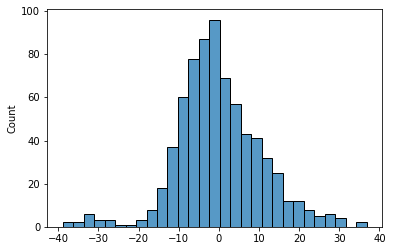

In [22]:
sns.histplot(model.resid)

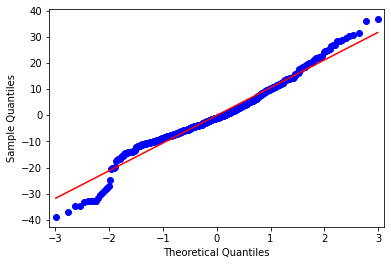

In [23]:
sm.qqplot(model.resid, line='s');

In [24]:
from scipy.stats import shapiro
shapiro(model.resid)
#no cumple con el requisito de normalidad

ShapiroResult(statistic=0.9703445434570312, pvalue=6.484322107036533e-11)

## Homogeneidad de varianza (valores ajustados vs. residuales)

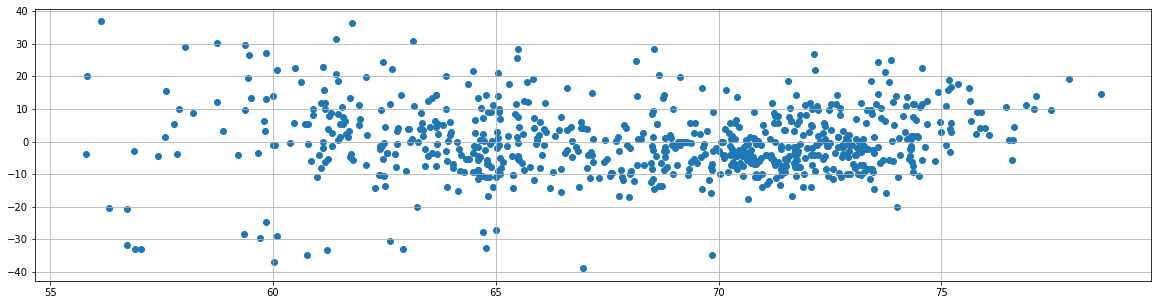

In [25]:
plt.figure(figsize=(20,5))
plt.scatter(x = model.fittedvalues, y = model.resid)
plt.grid(True)

### Independencia

In [26]:
model.resid

196    -6.331662
631    -3.751452
81     -0.105412
526    -2.769929
830    14.335322
         ...    
87     13.887532
330    -8.576411
466     9.912320
121     8.167844
860    11.059134
Length: 721, dtype: float64

In [27]:
res = pd.DataFrame(model.resid).reset_index(drop=True)
res.head()

,0
0,-6.331662
1,-3.751452
2,-0.105412
3,-2.769929
4,14.335322


In [28]:
res = pd.DataFrame(model.resid).reset_index(drop=True)
res = res.rename(columns={0: 'residuales'})
res.head()

,residuales
0,-6.331662
1,-3.751452
2,-0.105412
3,-2.769929
4,14.335322


In [29]:
orden = pd.DataFrame(pd.Series(range(1,12622)))
orden = orden.rename(columns={0: 'orden'})
orden.head()

,orden
0,1
1,2
2,3
3,4
4,5


In [30]:
indep = pd.concat([orden, res], axis = 1)
indep.head()

,orden,residuales
0,1,-6.331662
1,2,-3.751452
2,3,-0.105412
3,4,-2.769929
4,5,14.335322


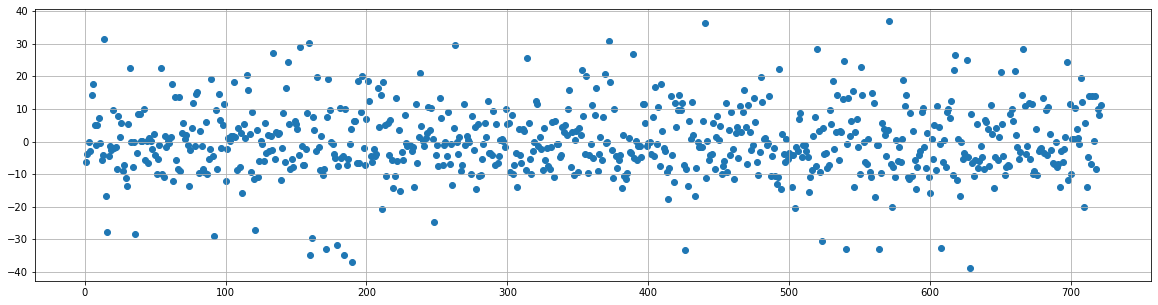

In [31]:
plt.figure(figsize=(20,5))
plt.scatter(x=indep['orden'], y=indep['residuales'])
plt.grid(True)
#Los valores son independientes entre si

## Predicción

In [32]:
model.predict(X_test)

31     71.016221
109    70.991490
136    71.896314
88     75.214227
918    60.590046
         ...    
250    69.546063
377    66.280280
615    74.820163
9      71.815696
357    71.870906
Length: 309, dtype: float64

In [33]:
pred1 = pd.DataFrame(model.predict(X_test)).reset_index(drop=True)
pred1 = pred1.rename(columns={0: 'pred1'})
pred1.head()

,pred1
0,71.016221
1,70.991490
2,71.896314
3,75.214227
4,60.590046


In [34]:
pred1.shape

(309, 1)

In [35]:
y_test = y_test.reset_index(drop=True)
m1_resultados = pd.concat([y_test, pred1], axis = 1)
m1_resultados.head()

,Overall Rating,pred1
0,69,71.016221
1,75,70.991490
2,84,71.896314
3,89,75.214227
4,78,60.590046


In [36]:
y_test.head()

,Overall Rating
0,69
1,75
2,84
3,89
4,78


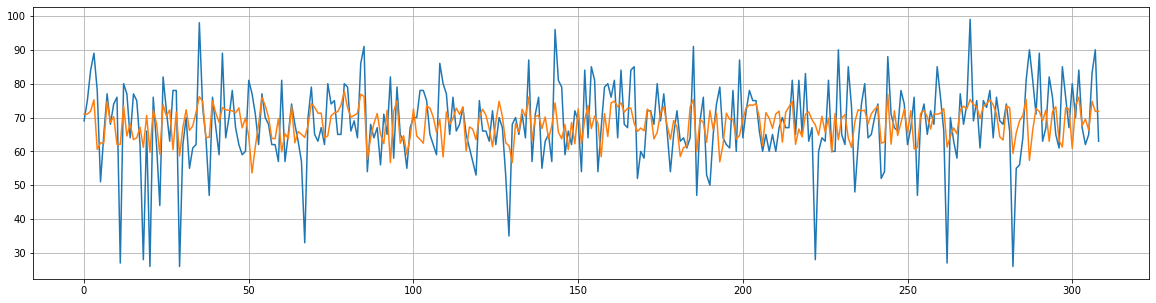

In [37]:
plt.figure(figsize=(20,5))
plt.plot(m1_resultados['Overall Rating']) #color azul
plt.plot(m1_resultados['pred1']) #color naranja
plt.grid(True)

In [38]:
m1_resultados = m1_resultados.head(20)

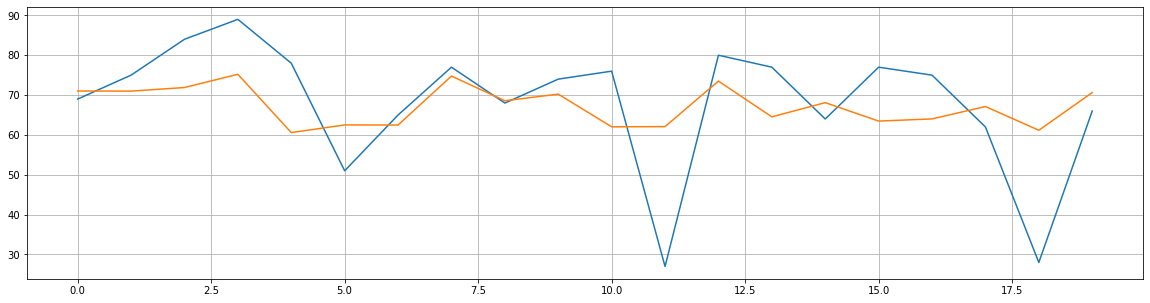

In [39]:
plt.figure(figsize=(20,5))
plt.plot(m1_resultados['Overall Rating']) #color azul
plt.plot(m1_resultados['pred1']) #color naranja
plt.grid(True)

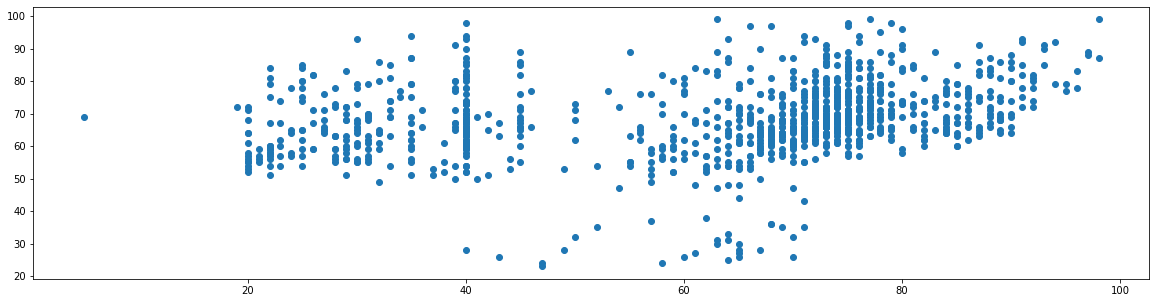

In [41]:
x=df['Carrying']
plt.figure(figsize=(20,5))
plt.scatter(x=df['Carrying'], y=df['Overall Rating'])

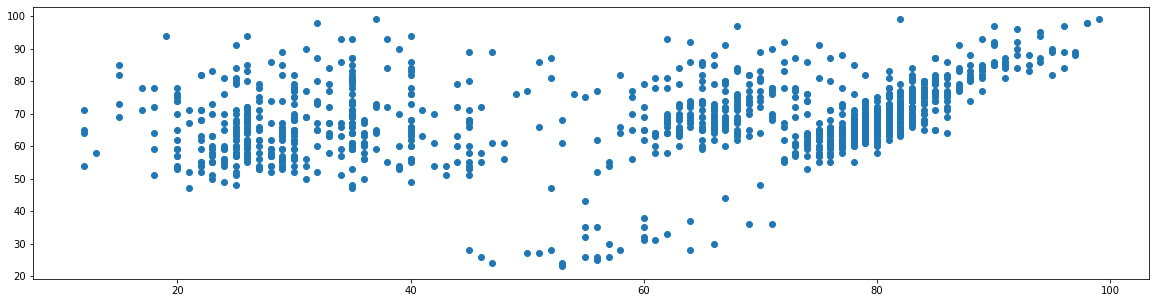

In [42]:
x=df['Catching']
plt.figure(figsize=(20,5))
plt.scatter(x=df['Catching'], y=df['Overall Rating'])

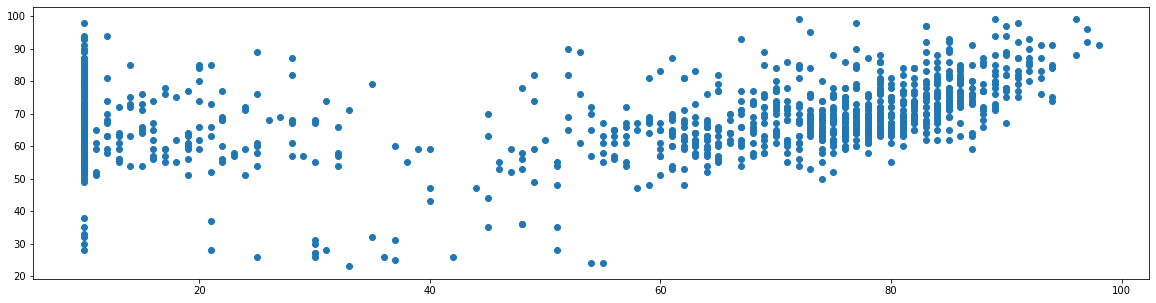

In [43]:
x=df['Juke Move']
plt.figure(figsize=(20,5))
plt.scatter(x=df['Juke Move'], y=df['Overall Rating'])

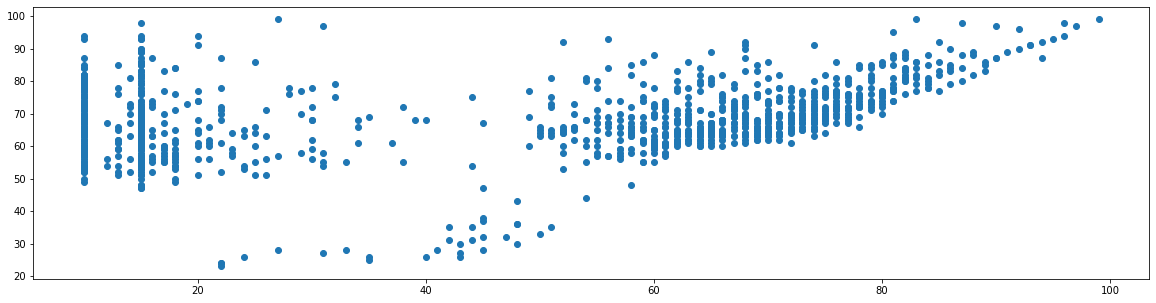

In [46]:
x=df['Short Route Running']
plt.figure(figsize=(20,5))
plt.scatter(x=df['Short Route Running'], y=df['Overall Rating'])

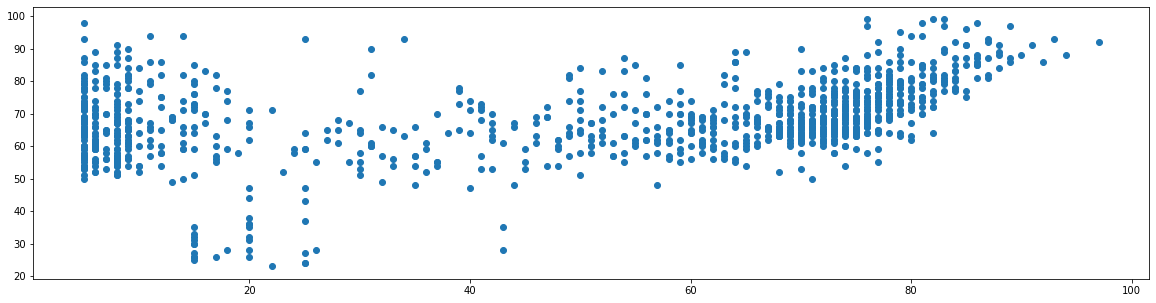

In [47]:
x=df['Break Tackle']
plt.figure(figsize=(20,5))
plt.scatter(x=df['Break Tackle'], y=df['Overall Rating'])